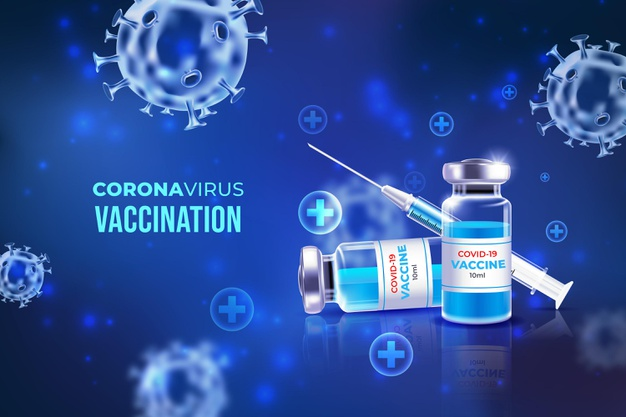

**Julian Gabriel Fita** - *March 8, 2022*

*Updated: Aug 3, 2022

---

**Using this dataset we will attempt to analyze the number of immunizations given over time as well as the number of immunizations given by each manufacturer.**

In [1]:
# Load packages
library(tidyverse)
library(janitor)
library(bit64)
library(highcharter)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Loading required package: bit


Attaching package: ‘bit’


The following object is masked from ‘package:base’:

    xor


Attaching package bit64

package:bit64 (c) 2011-2017 Jens Oehlschlaegel

creators: integer64 runif64 seq :

coercion: as.integer64 as.vector as.logical as.integer as.double as.character as.bitstring

logical operator: ! & | xor != == < <= >= >

arithmetic operator: + - * / %/% %% ^

math: sign abs sqrt log log2 log10

math: floor ceiling trunc round

querying: is.integer6

In [2]:
# Load datasets
country_vaccinations <- read.csv('../input/covid-world-vaccination-progress/country_vaccinations.csv')
country_vaccinations_by_manufacturer <- read.csv('../input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv')

In [3]:
# Look the dataset
glimpse(country_vaccinations)
glimpse(country_vaccinations_by_manufacturer)

Rows: 86,512
Columns: 15
$ country                             <chr> "Afghanistan", "Afghanistan", "Afg…
$ iso_code                            <chr> "AFG", "AFG", "AFG", "AFG", "AFG",…
$ date                                <chr> "2021-02-22", "2021-02-23", "2021-…
$ total_vaccinations                  <dbl> 0, NA, NA, NA, NA, NA, 8200, NA, N…
$ people_vaccinated                   <dbl> 0, NA, NA, NA, NA, NA, 8200, NA, N…
$ people_fully_vaccinated             <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ daily_vaccinations_raw              <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ daily_vaccinations                  <dbl> NA, 1367, 1367, 1367, 1367, 1367, …
$ total_vaccinations_per_hundred      <dbl> 0.00, NA, NA, NA, NA, NA, 0.02, NA…
$ people_vaccinated_per_hundred       <dbl> 0.00, NA, NA, NA, NA, NA, 0.02, NA…
$ people_fully_vaccinated_per_hundred <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ daily_vaccinations_per_million      <dbl> NA, 34, 34, 34, 34, 34, 34, 40, 45…
$ vaccines     

**Some changes to data formats are required:**

**in `country_vaccinations`:**
* *date column is of type 'character' and should be of type 'date',*
* *total_vaccinations column is of type 'float/double' and should be of type 'integer',*
* *people_vaccinated column is of type 'float/double' and should be of type 'integer',*
* *daily_vaccinations_raw column is of type 'float/double' and should be of type 'integer',*
* *daily_vaccinations column is of type 'float/double' and should be of type 'integer', and*
* *daily_vaccinations_per_million column is of type 'float/double' and should be of type 'integer'.*

**in `country_vaccinations_by_manufacturer`:**
* *date column is of type 'character' and should be of type 'date'.*

In [4]:
# country_vaccinations:
# I create a variable with the correct formats
country_vaccinations.formatted <- country_vaccinations %>%
  mutate(date = as.Date(date),
         total_vaccinations = as.integer64(total_vaccinations)) %>%
  mutate_at(c('people_vaccinated',
              'daily_vaccinations_raw',
              'daily_vaccinations',
              'daily_vaccinations_per_million'), as.integer)

In [5]:
# country_vaccinations_by_manufacturer:
# I create a variable with the correct formats
country_vaccinations_by_manufacturer.formatted <- country_vaccinations_by_manufacturer %>%
  mutate(date = as.Date(date))

*With both data sets formatted to their correct types we can continue*

In [6]:
# Are there duplicate data?
anyDuplicated(country_vaccinations)
anyDuplicated(country_vaccinations_by_manufacturer)

[1] 0

[1] 0

*There are no duplicate data, we continue*

In [7]:
# How many immunizations were administered in the world to date?
immunizations_applied <- country_vaccinations.formatted %>%
  summarise(total_immunizations = sum(total_vaccinations, na.rm = TRUE))

immunizations_applied

total_immunizations
<int64>
2002854013761


**In the world, 1,750,421,656,741 immunizations have been applied to date!**

In [8]:
# How many immunizations were administered in each country?
immunizations_applied_country <- country_vaccinations.formatted %>%
  group_by(country, iso_code) %>%
  summarise(total_immunizations = sum(total_vaccinations, na.rm = TRUE), .groups = 'drop') %>%
  arrange(desc(total_immunizations))

head(immunizations_applied_country)

country,iso_code,total_immunizations
<chr>,<chr>,<int64>
China,CHN,709452663700
India,IND,323440305798
United States,USA,155013867208
Brazil,BRA,79067174395
Indonesia,IDN,45214622016
Germany,DEU,38982830332


---

<center>All the graphs presented are interactive. You can hover the mouse cursor over the map, or line/bar graph to see their results.</center>

---

**<center> In this map we can see the amount of immunizations applied in each country. </center>**

In [9]:
# Creation of the graph where the amount of immunizations applied by each country is represented
hc_my_theme <- hc_theme_merge(hc_theme_flatdark(),
                              hc_theme(chart = list(backgroundColor = '#242f39'),
                                       subtitle = list(style = list(color = '#a7a5a5'))))

data(worldgeojson, package = "highcharter")

# Needed some change in the values of the 'country' column to match the geoposition of the 'worldgeojson' dataset
immunizations_applied_country$country[immunizations_applied_country$country == 'United States'] <- 'United States of America'
immunizations_applied_country$country[immunizations_applied_country$country == 'Bahamas'] <- 'The Bahamas'
immunizations_applied_country$country[immunizations_applied_country$country == 'Guinea-Bissau'] <- 'Guinea Bissau'
immunizations_applied_country$country[immunizations_applied_country$country == "Cote d'Ivoire"] <- 'Ivory Coast'
immunizations_applied_country$country[immunizations_applied_country$country == 'Congo'] <- 'Republic of Congo'
immunizations_applied_country$country[immunizations_applied_country$country == 'Democratic Republic of Congo'] <- 'Democratic Republic of the Congo'
immunizations_applied_country$country[immunizations_applied_country$country == 'Tanzania'] <- 'United Republic of Tanzania'
immunizations_applied_country$country[immunizations_applied_country$country == 'Eswatini'] <- 'Swaziland'
immunizations_applied_country$country[immunizations_applied_country$country == 'Czechia'] <- 'Czech Republic'
immunizations_applied_country$country[immunizations_applied_country$country == 'Serbia'] <- 'Republic of Serbia'
immunizations_applied_country$country[immunizations_applied_country$country == 'Timor'] <- 'East Timor'
immunizations_applied_country$country[immunizations_applied_country$country == 'North Macedonia'] <- 'Macedonia'

# Chart creation
plot_immunizations_applied_country <- highchart() %>% 
  hc_add_series_map(worldgeojson,
                    immunizations_applied_country,
                    value = 'total_immunizations',
                    joinBy = c('name', 'country'),
                    name = 'Immunizations in:',
                    borderWidth = 0,
                    nullColor = "#d3d3d3") %>%
  hc_title(text = 'Immunizations applied per country') %>%
  hc_subtitle(text ='How many applied immunizations does each country have?') %>%
  hc_colorAxis(stops = color_stops(colors = viridisLite::turbo(10,
                                                                 begin = 0.2))) %>%
  hc_add_theme(hc_my_theme) %>%
  hc_mapNavigation(enabled = TRUE) %>%
  hc_credits(enabled = FALSE) %>%
  hc_exporting(enabled = TRUE)


# this is just a workaround to make the kaggle kernel show the plot correctly
htmlwidgets::saveWidget(plot_immunizations_applied_country, 'plot_immunizations_applied_country.html')
IRdisplay::display_html('<iframe src="plot_immunizations_applied_country.html" width=100% height=800></iframe>')

**<center> Below we can see the number of immunizations applied over time </center>**

In [10]:
options(repr.plot.width = 14, repr.plot.height = 18) # Modification of the size in which the graph is displayed
# Creation of graph where we can see the immunizations applied by each manufacturer
immnunizations_manufacturer <- country_vaccinations_by_manufacturer.formatted %>%
  drop_na() %>%
  group_by(date,
           vaccine) %>%
  summarise(total_vaccinations = sum(total_vaccinations), .groups = 'drop')

# Chart creation
plot_immunizations_manufacter <- immnunizations_manufacturer %>%
  hchart('line',
         hcaes(x = date,
               y = total_vaccinations,
               group = vaccine)) %>% 
  hc_title(text = 'Immunizations applied by manufacturer') %>%
  hc_subtitle(text = 'Number of immunizations applied throughout the days by each manufacturer') %>%
  hc_xAxis(title = list(text = 'Date')) %>%
  hc_yAxis(title = list(text ='Total vaccinations')) %>%
  hc_tooltip(crosshairs = TRUE,
             shared = TRUE, 
             borderWidth = 4,
             sort = TRUE,
             table = TRUE) %>%
  hc_add_theme(hc_theme_538()) %>%
  hc_exporting(enabled = TRUE)

# this is just a workaround to make the kaggle kernel show the plot correctly
htmlwidgets::saveWidget(plot_immunizations_manufacter, 'plot_immunizations_manufacter.html')
IRdisplay::display_html('<iframe src="plot_immunizations_manufacter.html" width=100% height=800></iframe>')

In [11]:
# We create and group the information and then use it in the graph
countryVaccinationsManufacturer <- country_vaccinations_by_manufacturer.formatted %>%
  group_by(location, vaccine) %>%
  summarise(total_vaccinations = sum(total_vaccinations), .groups = 'drop')

# Chart creation
plot_countryVaccinationsManufacturer <- countryVaccinationsManufacturer %>%
  hchart('bar',
         hcaes(x = vaccine,
               y = total_vaccinations,
               group = location)) %>% 
  hc_title(text = 'Immunizations applied') %>%
  hc_subtitle(text = 'How many immunizations has each manufacturer applied in each country?') %>%
  hc_xAxis(title = list(text = 'Date')) %>%
  hc_yAxis(title = list(text ='Total vaccinations')) %>%
  hc_tooltip(crosshairs = TRUE,
             shared = TRUE, 
             borderWidth = 4,
             sort = TRUE,
             table = TRUE) %>%
  hc_add_theme(hc_theme_538()) %>%
  hc_exporting(enabled = TRUE)

# this is just a workaround to make the kaggle kernel show the plot correctly
htmlwidgets::saveWidget(plot_countryVaccinationsManufacturer, 'plot_countryVaccinationsManufacturer.html')
IRdisplay::display_html('<iframe src="plot_countryVaccinationsManufacturer.html" width=100% height=800></iframe>')

In [12]:
# Chart creation
plot_VaccinationsManufacturerLocations <- countryVaccinationsManufacturer %>%
  hchart('bar',
         hcaes(x = location,
               y = total_vaccinations,
               group = vaccine)) %>% 
  hc_title(text = 'Immunizations applied') %>%
  hc_subtitle(text = 'How many immunizations has each manufacturer applied in each country?') %>%
  hc_xAxis(title = list(text = 'Date')) %>%
  hc_yAxis(title = list(text ='Total vaccinations')) %>%
  hc_tooltip(crosshairs = TRUE,
             shared = TRUE, 
             borderWidth = 4,
             sort = TRUE,
             table = TRUE) %>%
  hc_add_theme(hc_theme_538()) %>%
  hc_credits(enabled = FALSE)

# this is just a workaround to make the kaggle kernel show the plot correctly
htmlwidgets::saveWidget(plot_VaccinationsManufacturerLocations, 'plot_VaccinationsManufacturerLocations.html')
IRdisplay::display_html('<iframe src="plot_VaccinationsManufacturerLocations.html" width=100% height=800></iframe>')

---

I thank you for reading my work and I hope you enjoyed them.

If you think that my analysis was not correct or otherwise I will be reading them in the comments.

---